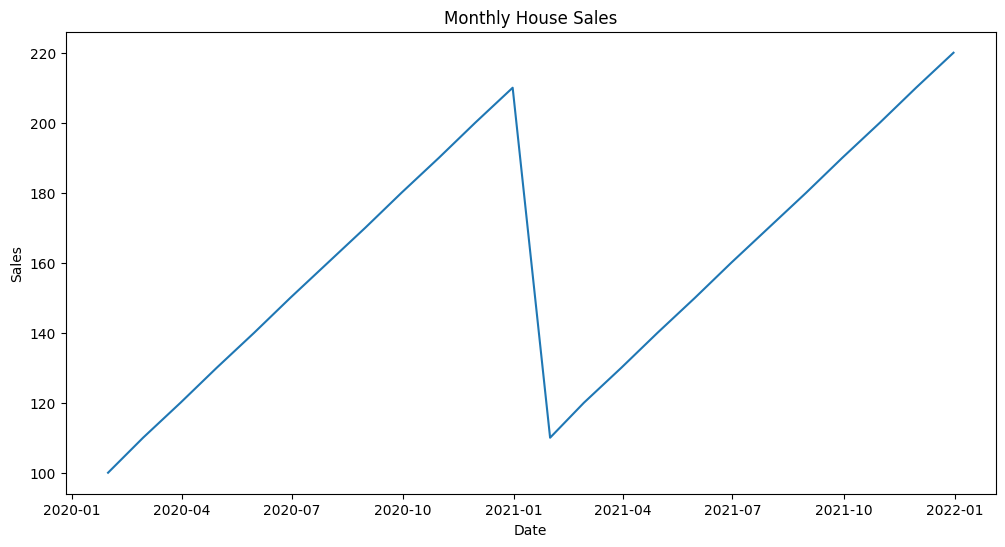

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load your dataset into a pandas DataFrame
# Replace 'your_data.csv' with your actual dataset file path
df = pd.read_csv('data.csv')

# Convert the date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

# Resample the data to the desired frequency (e.g., monthly)
# This helps in handling irregular data and creating a regular time series
resampled_df = df.resample('M').sum()  # Change 'M' to your desired frequency (e.g., 'D' for daily)

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(resampled_df['Sales'])
plt.title('Monthly House Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


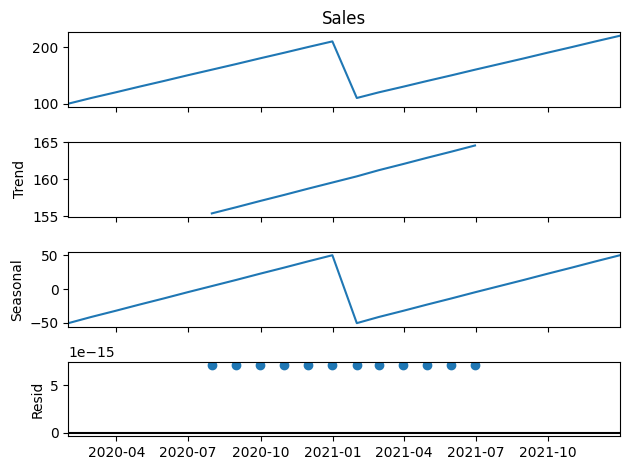

C:\Users\yaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\yaswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:

# Decompose the time series to understand trends, seasonality, and residuals
decomposition = sm.tsa.seasonal_decompose(resampled_df['Sales'], model='additive')
decomposition.plot()
plt.show()

# Fit a time series forecasting model (e.g., SARIMA)
# You may need to fine-tune the model parameters based on your data
model = sm.tsa.SARIMAX(resampled_df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast future sales
forecast_steps = 12  # Number of months to forecast into the future
forecast = results.get_forecast(steps=forecast_steps)

# Get confidence intervals for the forecast
forecast_ci = forecast.conf_int()


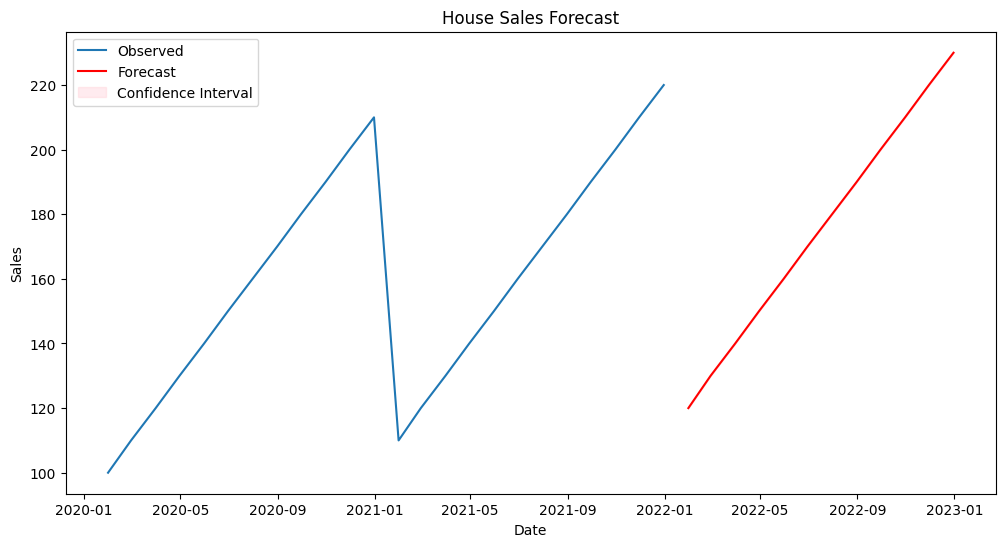

Forecasted Sales:
2022-01-31    120.0
2022-02-28    130.0
2022-03-31    140.0
2022-04-30    150.0
2022-05-31    160.0
2022-06-30    170.0
2022-07-31    180.0
2022-08-31    190.0
2022-09-30    200.0
2022-10-31    210.0
2022-11-30    220.0
2022-12-31    230.0
Freq: M, Name: predicted_mean, dtype: float64


In [7]:
# Plot the observed, forecasted, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(resampled_df['Sales'], label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')

# Fill the confidence intervals
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='Confidence Interval'
)

plt.title('House Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Print the forecasted values
print("Forecasted Sales:")
print(forecast.predicted_mean)